# Training test code for VIKI

In [1]:
#Libraries
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Milan\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Sun position calculation

In [2]:
# sunpos.py
import math
def sunpos(when, location, refraction):
# Extract the passed data
    year, month, day, hour, minute, second, timezone = when
    latitude, longitude = location
# Math typing shortcuts
    rad, deg = math.radians, math.degrees
    sin, cos, tan = math.sin, math.cos, math.tan
    asin, atan2 = math.asin, math.atan2
# Convert latitude and longitude to radians
    rlat = rad(latitude)
    rlon = rad(longitude)
# Decimal hour of the day at Greenwich
    greenwichtime = hour - timezone + minute / 60 + second / 3600
# Days from J2000, accurate from 1901 to 2099
    daynum = (
        367 * year
        - 7 * (year + (month + 9) // 12) // 4
        + 275 * month // 9
        + day
        - 730531.5
        + greenwichtime / 24
    )
# Mean longitude of the sun
    mean_long = daynum * 0.01720279239 + 4.894967873
# Mean anomaly of the Sun
    mean_anom = daynum * 0.01720197034 + 6.240040768
# Ecliptic longitude of the sun
    eclip_long = (
        mean_long
        + 0.03342305518 * sin(mean_anom)
        + 0.0003490658504 * sin(2 * mean_anom)
    )
# Obliquity of the ecliptic
    obliquity = 0.4090877234 - 0.000000006981317008 * daynum
# Right ascension of the sun
    rasc = atan2(cos(obliquity) * sin(eclip_long), cos(eclip_long))
# Declination of the sun
    decl = asin(sin(obliquity) * sin(eclip_long))
# Local sidereal time
    sidereal = 4.894961213 + 6.300388099 * daynum + rlon
# Hour angle of the sun
    hour_ang = sidereal - rasc
# Local elevation of the sun
    elevation = asin(sin(decl) * sin(rlat) + cos(decl) * cos(rlat) * cos(hour_ang))
# Local azimuth of the sun
    azimuth = atan2(
        -cos(decl) * cos(rlat) * sin(hour_ang),
        sin(decl) - sin(rlat) * sin(elevation),
    )
# Convert azimuth and elevation to degrees
    azimuth = into_range(deg(azimuth), 0, 360)
    elevation = into_range(deg(elevation), -180, 180)
# Refraction correction (optional)
    if refraction:
        targ = rad((elevation + (10.3 / (elevation + 5.11))))
        elevation += (1.02 / tan(targ)) / 60
# Return azimuth and elevation in degrees
    return (round(azimuth, 2), round(elevation, 2))
def into_range(x, range_min, range_max):
    shiftedx = x - range_min
    delta = range_max - range_min
    return (((shiftedx % delta) + delta) % delta) + range_min

## Reading the data

In [3]:
data = open("LANGEVIN_DATA.txt", "r")
rl = data.readlines()
nl = len(rl)
print('number of lines:', nl)

number of lines: 840984


In [4]:
#Useful functions
def is_nan(x):
    for i in range(len(x)):
        if str(x[i])=='NaN':
            return True
#        if str(x[i])=='0.000000':
#            return True
        else:
            continue

In [5]:
import pandas as pd
from datetime import datetime

def matlab2py_date(x):
    # Additional 366 because January 0, year 0000 
    offset = datetime(1970, 1, 1).toordinal() + 366  #719529
    return pd.to_datetime(x-offset, unit='D')
    #0   2012-07-30 00:15:00.028799999
    #1   2012-07-30 00:29:59.971200000
    #Name: Time, dtype: datetime64[ns]

In [6]:
########## DATA BASE ##############
t = []
Ti = []
hi = []
vi = []
To = []
ho = []
vo = []
csp = []
hsp = []

########### SUN POSITION ##########
az = []
el = []
# Close Encounters latitude, longitude Philadelphia
location = (39.952583, -75.165222)

########## DATE FORMAT ############
date_time = []
#sfecha = []
#shora = []
fecha = []
hora = []
#str_date_time = np.zeros(len(rl))

j = 0
for i in range(nl): #Write data
    rli = rl[i].split()
    udat = np.array([rli[0],rli[5],rli[6],rli[7],rli[11],rli[12],rli[13]])#,rli[59],rli[61]]) #t,Ti,hi,vi,To,ho,vo,csp,hcp
    
    date_time.append(matlab2py_date(float(rl[i].split()[0])).strftime("%d-%m-%Y, %H:%M:%S"))

    if is_nan(udat)==True:
#        j+=1
        continue
    else:
        ########### Weather and building data ########################
#        t.append(float(udat[0]))
        Ti.append(float(udat[1]))
        hi.append(float(udat[2]))
#        vi.append(float(udat[3]))
        To.append(float(udat[4]))
        ho.append(float(udat[5]))
        vo.append(float(udat[6]))
        csp.append(float(rl[i].split()[59]))
        hsp.append(float(rl[i].split()[61]))
        
        ########## convert date format ##############################    
        # convert timestamp to string in dd-mm-yyyy HH:MM:SS
#    str_date_time[l] = date_time[l].strftime("%d-%m-%Y, %H:%M:%S")
        sfecha = date_time[i].split(',')[0].split('-')
        shora = date_time[i].split(',')[1].split(':')
        fecha.append([float(x) for x in sfecha])
        hora.append([float(y) for y in shora])
        
        ########## Sun azimut and elevation #########################
        # Fourth of July, 2022 at 11:20 am MDT (+2 hours)
        when = (fecha[j][2], fecha[j][1], fecha[j][0], hora[j][0], hora[j][1], hora[j][2], +2)
        # Get the Sun's apparent location in the sky
        az.append(sunpos(when, location, True)[0])
        el.append(sunpos(when, location, True)[1])
        j+=1
        
#print('t:', t[0])
#print('Ti:', Ti[0])
#print('hi:', hi[0])
#print('vi:', vi[0])
#print('To:', To[0])
#print('ho:', ho[0])
#print('vo:', vo[0])

print('Heating setpoint: ', hsp,' [°C]' )
print('Cooling setpoint: ', csp,' [°C]' )
num=len(Ti)
print('Amount of training data:', num)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
t = []
date_time_r = date_time
for k in range (len(date_time)):
    date_time_r[k] = date_time[k].replace("-", "/")
    date_time_r[k] = date_time[k].replace(",", "")
    t.append(datetime.strptime(date_time_r[k], '%d/%m/%Y %H:%M:%S'))

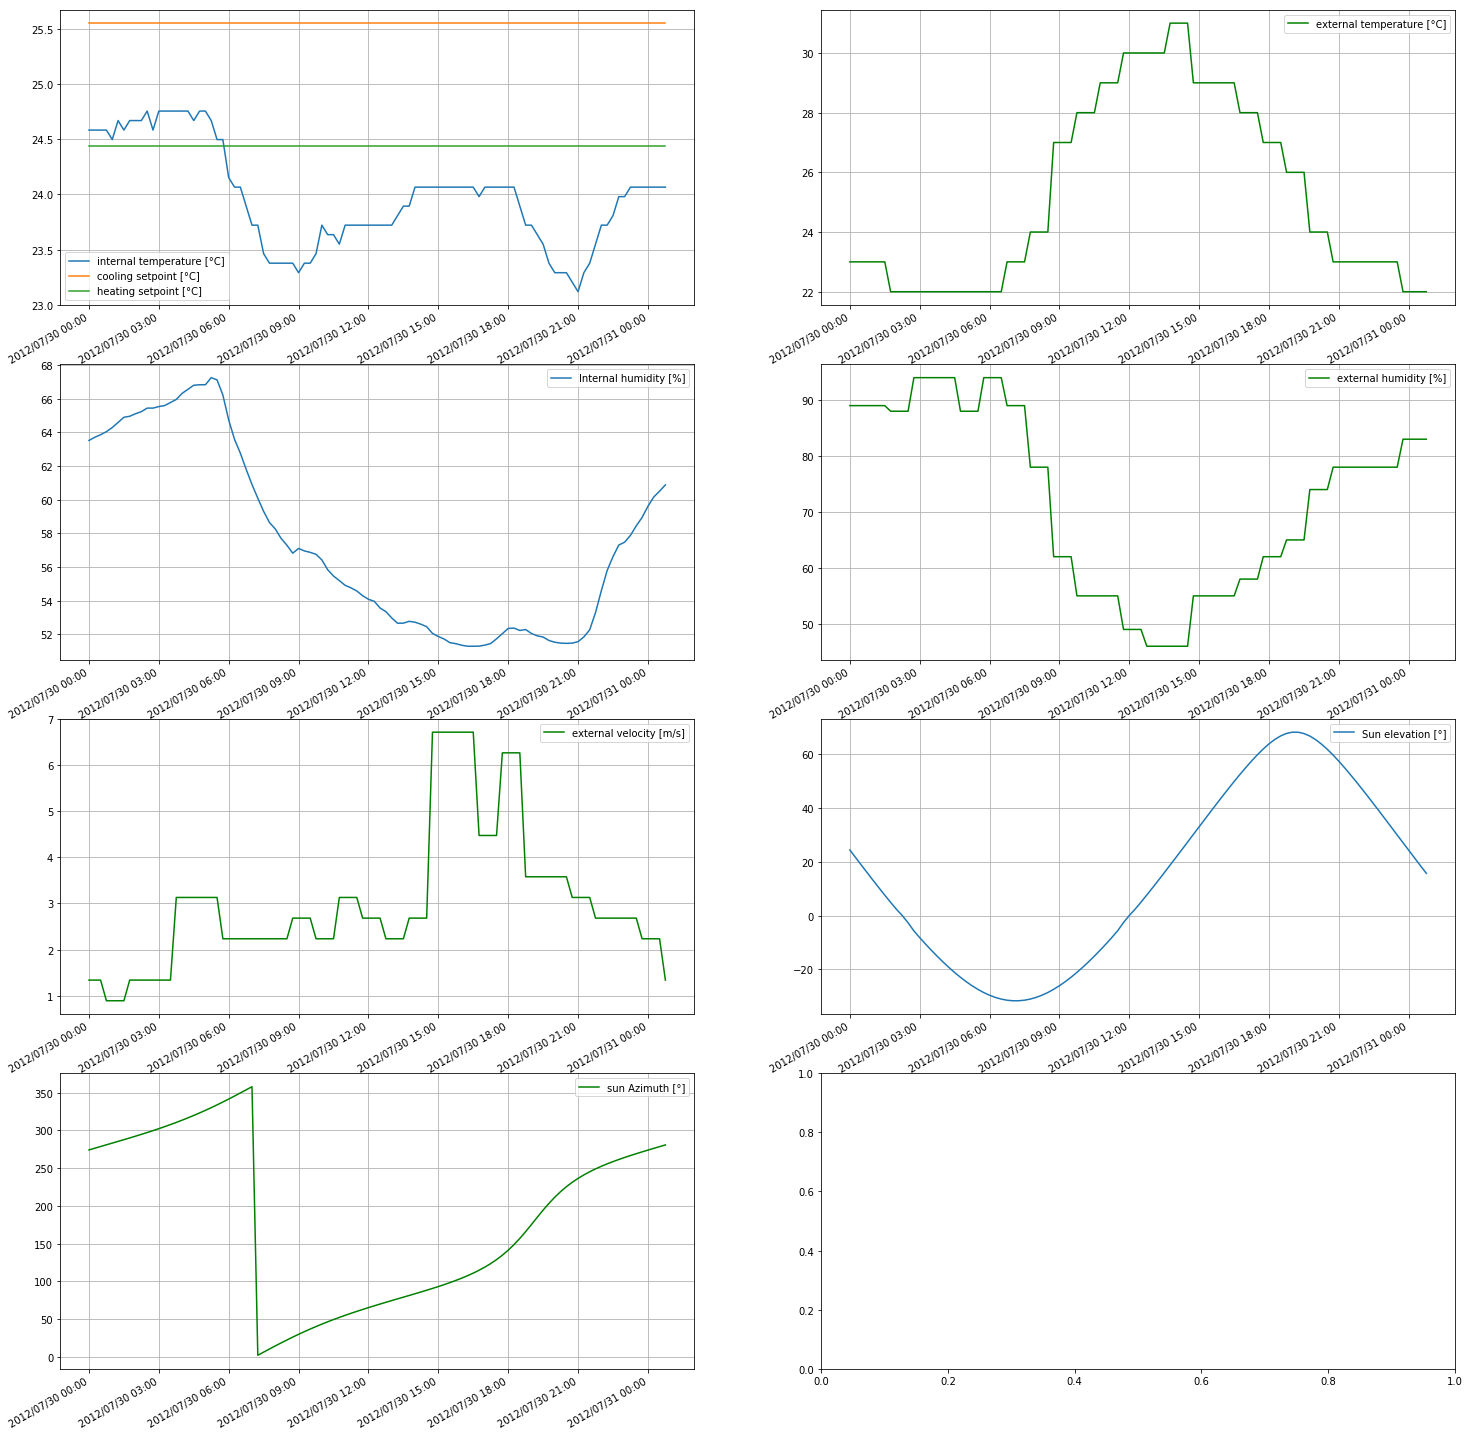

In [29]:
import matplotlib.dates as mdates
lge = 0
rge = 100
plt.rcParams["figure.figsize"] = (25,25)

figure, axis = plt.subplots(4, 2)

########### Configuration of x label ################################
plt.setp(axis[0, 0].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[0, 1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[1, 0].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[1, 1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[2, 0].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[2, 1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axis[3, 0].get_xticklabels(), rotation=30, ha='right')
########### Internal temperature ################################
axis[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[0, 0].xaxis_date()
axis[0, 0].plot_date(t[lge:rge], Ti[lge:rge], label='internal temperature [°C]', ls='-', marker='')
axis[0, 0].plot_date(t[lge:rge], csp[lge:rge], label='cooling setpoint [°C]', ls='-', marker='')
axis[0, 0].plot_date(t[lge:rge], hsp[lge:rge], label='heating setpoint [°C]', ls='-', marker='')
axis[0, 0].grid()
axis[0, 0].legend(loc="best")
#axis[0, 0].set_title("Temperatura interna [°C]")
########### External temperature ################################
axis[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[0, 1].xaxis_date()
axis[0, 1].plot_date(t[lge:rge], To[lge:rge], color='green', label='external temperature [°C]', ls='-', marker='')
axis[0, 1].grid()
axis[0, 1].legend(loc="best")
#axis[0, 1].set_title("Temperatura externa [°C]")
########### Internal relative humidity ################################
axis[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[1, 0].xaxis_date()
axis[1, 0].plot(t[lge:rge], hi[lge:rge], label='Internal humidity [%]', ls='-', marker='')
axis[1, 0].grid()
axis[1, 0].legend(loc="best")
#axis[1, 0].set_title("Humedad interna [%]")
########### External relative humidity ################################
axis[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[1, 1].xaxis_date()
axis[1, 1].plot(t[lge:rge], ho[lge:rge], c='g', label='external humidity [%]', ls='-', marker='')
axis[1, 1].grid()
axis[1, 1].legend(loc="best")
#axis[1, 1].set_title("Humedad externa [%]")
########### External velocity ################################
axis[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[2, 0].xaxis_date()
axis[2, 0].plot(t[lge:rge], vo[lge:rge], c='g', label='external velocity [m/s]', ls='-', marker='')
axis[2, 0].grid()
axis[2, 0].legend(loc="best")
#axis[2, 0].set_title("Velocidad externa [m/s]")
########### Sun elevation ################################
axis[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[2, 1].xaxis_date()
axis[2, 1].plot(t[lge:rge], el[lge:rge], label='Sun elevation [°]', ls='-', marker='')
axis[2, 1].grid()
axis[2, 1].legend(loc="best")
#axis[2, 1].set_title("Elevación del sol [°]")
########### Sun azimut ################################
axis[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
axis[3, 0].xaxis_date()
axis[3, 0].plot(t[lge:rge], az[lge:rge], c='g', label='sun Azimuth [°]', ls='-', marker='')
axis[3, 0].grid()
axis[3, 0].legend(loc="best")
#axis[3, 0].set_title("Azimut del sol [°]")

plt.show()

## Machine learning

In [9]:
print(tf.__version__)

2.8.0


In [10]:
#INPUT
train_num = 12000 #Number of training data
x_train = np.zeros((train_num,7))
y_train = np.zeros(train_num)
for j in range(train_num):
    x_train[j,:] = [Ti[j], hi[j], To[j], ho[j], vo[j], az[j], el[j]]
    y_train[j] = Ti[j+2]
#OUTPUT
#y_train = np.array(Ti)

In [11]:
#NORMALIZATION
from tensorflow.keras import layers
import statistics

def norm(x):
    nf = x
    for i in range(len(x)):
        nf[i,:]= x[i,:] - statistics.mean(x_train[i,:]) / statistics.stdev(x_train[i,:])
        #print(x[:,i])
#    print(nf)
    return nf

normed_train_data = x_train #norm(x_train)
#print(normed_train_data)
#normed_test_data = norm(x_train)
#print(x_train)

In [12]:
#BUILDING NEURAL NETWORK MODEL
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=7),  #Ojo con la dimension de entrada cuando se agregan variables de entrenamiento
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [13]:
#OPTIMIZATION MODEL
optimizer=tf.keras.optimizers.RMSprop(0.001)
model = build_model()
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [15]:
#CHECKING THAT THE MODEL IS OK
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[12.98262  ],
       [13.013851 ],
       [13.033947 ],
       [13.0081005],
       [13.032803 ],
       [13.039982 ],
       [13.083126 ],
       [13.285215 ],
       [13.349394 ],
       [13.426844 ]], dtype=float32)

In [16]:
#TRAINING!
# Display training progress by printing a single dot for each completed epoch
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 25

history = model.fit(
  normed_train_data, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[PrintDot()])

Epoch 1/25
300/300 [==============================] - 3s 3ms/step - loss: 8.6727 - mae: 2.1998 - mse: 8.6727 - val_loss: 6.5702 - val_mae: 2.2257 - val_mse: 6.5702
Epoch 2/25
300/300 [==============================] - 0s 2ms/step - loss: 3.3636 - mae: 1.4581 - mse: 3.3636 - val_loss: 3.7379 - val_mae: 1.5943 - val_mse: 3.7379
Epoch 3/25
300/300 [==============================] - 0s 1ms/step - loss: 2.3787 - mae: 1.2217 - mse: 2.3787 - val_loss: 2.1218 - val_mae: 1.1697 - val_mse: 2.1218
Epoch 4/25
300/300 [==============================] - 1s 2ms/step - loss: 1.8635 - mae: 1.0942 - mse: 1.8635 - val_loss: 2.1300 - val_mae: 1.1553 - val_mse: 2.1300
Epoch 5/25
300/300 [==============================] - 0s 1ms/step - loss: 1.5793 - mae: 1.0041 - mse: 1.5793 - val_loss: 1.4658 - val_mae: 0.9538 - val_mse: 1.4658
Epoch 6/25
300/300 [==============================] - 0s 1ms/step - loss: 1.4073 - mae: 0.9348 - mse: 1.4073 - val_loss: 0.9792 - val_mae: 0.8101 - val_mse: 0.9792
Epoch 7/25
300/3

In [17]:
#PLOT TRAINING PROCESS
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
20,0.638293,0.635109,0.638293,0.266967,0.395041,0.266967,20
21,0.611928,0.633425,0.611928,0.881405,0.802168,0.881405,21
22,0.570078,0.609201,0.570078,0.875310,0.804737,0.875310,22
23,0.565924,0.608578,0.565924,0.606068,0.647864,0.606068,23
24,0.541680,0.598190,0.541680,0.616386,0.659956,0.616386,24


C:\Users\Milan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Milan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Milan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


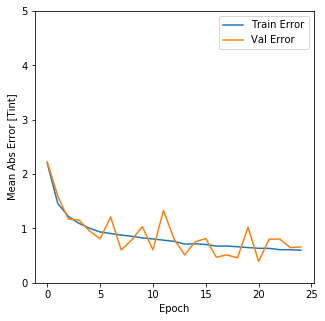

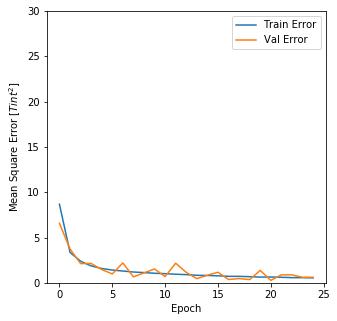

In [18]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Tint]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Tint^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,30])
    plt.legend()
    plt.show()

plt.rcParams["figure.figsize"] = (5,5)
plot_history(history)

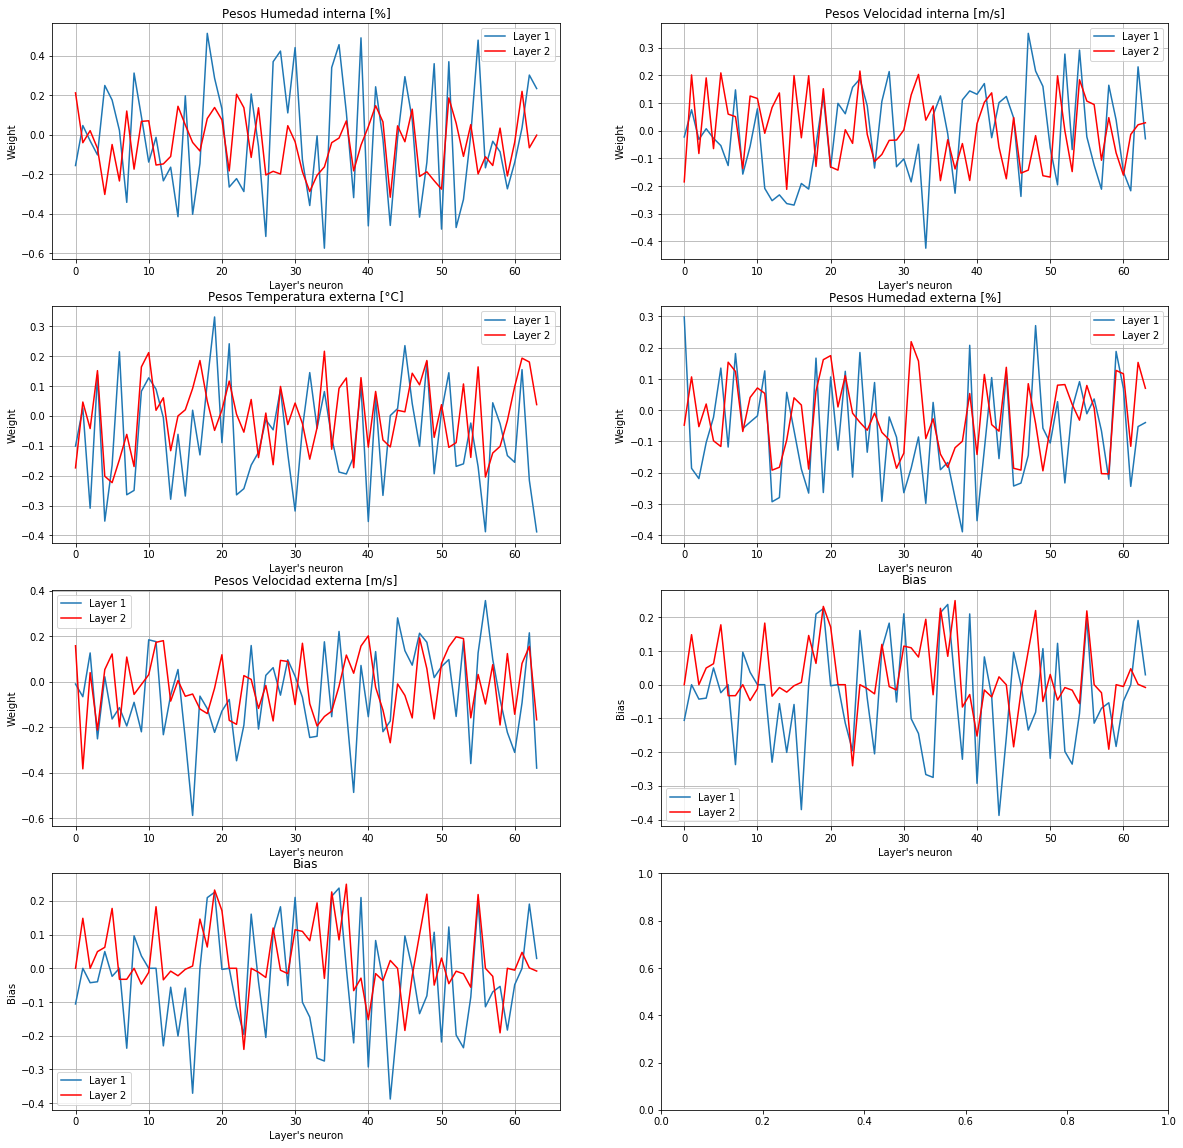

In [19]:
#PRINTING THE WEIGHTS

#Select layer
#lyn = 1
#print(model.layers[lyn].weights[0])
#print(model.layers[lyn].bias.numpy())
#print(model.layers[lyn].bias_initializer)

#LAYER 1
hiw1 = model.layers[0].weights[0][0]
viw1 = model.layers[0].weights[0][1]
Tow1 = model.layers[0].weights[0][2]
how1 = model.layers[0].weights[0][3]
vow1 = model.layers[0].weights[0][4]
bias1 = model.layers[0].bias.numpy()

#LAYER 2
hiw2 = model.layers[1].weights[0][0]
viw2 = model.layers[1].weights[0][1]
Tow2 = model.layers[1].weights[0][2]
how2 = model.layers[1].weights[0][3]
vow2 = model.layers[1].weights[0][4]
bias2 = model.layers[1].bias.numpy()

#PLOTTING
plt.rcParams["figure.figsize"] = (20,20)

figure, axis = plt.subplots(4, 2)
axis[0, 0].plot(hiw1, label='Layer 1')
axis[0, 0].plot(hiw2, c='r', label='Layer 2')
axis[0, 0].legend(loc="best")
axis[0, 0].grid()
axis[0, 0].set_xlabel("Layer's neuron")
axis[0, 0].set_ylabel("Weight")
axis[0, 0].set_title("Pesos Humedad interna [%]")

axis[0, 1].plot(viw1, label='Layer 1')
axis[0, 1].plot(viw2, c='r', label='Layer 2')
axis[0, 1].legend(loc="best")
axis[0, 1].grid()
axis[0, 1].set_xlabel("Layer's neuron")
axis[0, 1].set_ylabel("Weight")
axis[0, 1].set_title("Pesos Velocidad interna [m/s]")

axis[1, 0].plot(Tow1, label='Layer 1')
axis[1, 0].plot(Tow2, c='r', label='Layer 2')
axis[1, 0].legend(loc="best")
axis[1, 0].grid()
axis[1, 0].set_xlabel("Layer's neuron")
axis[1, 0].set_ylabel("Weight")
axis[1, 0].set_title("Pesos Temperatura externa [°C]")

axis[1, 1].plot(how1, label='Layer 1')
axis[1, 1].plot(how2, c='r', label='Layer 2')
axis[1, 1].legend(loc="best")
axis[1, 1].grid()
axis[1, 1].set_xlabel("Layer's neuron")
axis[1, 1].set_ylabel("Weight")
axis[1, 1].set_title("Pesos Humedad externa [%]")

axis[2, 0].plot(vow1, label='Layer 1')
axis[2, 0].plot(vow2, c='r', label='Layer 2')
axis[2, 0].legend(loc="best")
axis[2, 0].grid()
axis[2, 0].set_xlabel("Layer's neuron")
axis[2, 0].set_ylabel("Weight")
axis[2, 0].set_title("Pesos Velocidad externa [m/s]")

axis[2, 1].plot(bias1, label='Layer 1')
axis[2, 1].plot(bias2, c='r', label='Layer 2')
axis[2, 1].legend(loc="best")
axis[2, 1].grid()
axis[2, 1].set_xlabel("Layer's neuron")
axis[2, 1].set_ylabel("Bias")
axis[2, 1].set_title("Bias")

#Agregar azimut!!!!
axis[3, 0].plot(bias1, label='Layer 1')
axis[3, 0].plot(bias2, c='r', label='Layer 2')
axis[3, 0].legend(loc="best")
axis[3, 0].grid()
axis[3, 0].set_xlabel("Layer's neuron")
axis[3, 0].set_ylabel("Bias")
axis[3, 0].set_title("Bias")

plt.show()

In [20]:
hiw1sum = np.sum(hiw1)
viw1sum = np.sum(viw1)
Tow1sum = np.sum(Tow1)
how1sum = np.sum(how1)
vow1sum = np.sum(vow1)

hiw2sum = np.sum(hiw2)
viw2sum = np.sum(viw2)
Tow2sum = np.sum(Tow2)
how2sum = np.sum(how2)
vow2sum = np.sum(vow2)

print(hiw1sum, hiw2sum)
print(viw1sum, viw2sum)
print(Tow1sum, Tow2sum)
print(how1sum, how2sum)
print(vow1sum, vow2sum)

-1.0428939 -3.1008527
-0.8161558 -0.02111286
-4.3019443 0.059375077
-4.5238056 -1.1471984
-3.5863783 -1.0805831


In [21]:
test_num = 1500 #Number of test data
desf = 0
x_test = np.zeros((test_num,7))
y_test = np.zeros(test_num)
for m in range(test_num):
    x_test[m,:] = [Ti[m+train_num+desf], hi[m+train_num+desf], To[m+train_num+desf], ho[m+train_num+desf], vo[m+train_num+desf], az[m+train_num+desf], el[m+train_num+desf]]
    y_test[m] = Ti[m+train_num+desf+2]

In [22]:
#PREDICTING NEW TEMPERATURES
#x_test = normed_train_data
test_predictions = model.predict(x_test[:])

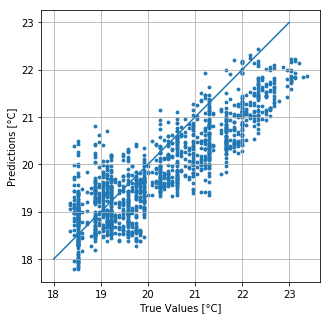

In [23]:
#PLOTTING PREDICTIONS VS TEST
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(y_test[0:], test_predictions[0:].T, s=8)
plt.xlabel('True Values [°C]')
plt.ylabel('Predictions [°C]')
plt.grid()
#plt.plot()
_ = plt.plot([18, 23], [18, 23])#[22.75, 24.75], [22.75, 24.75])

Text(0, 0.5, 'Count')

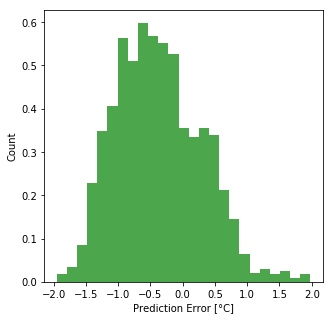

In [24]:
error =np.zeros(len(test_predictions))
#print(test_predictions)
#y_test=np.array([y_train]).T
#print(y_test)
error = test_predictions.T - y_test.T
plt.hist(error.T, 25, density = 2, color ='green', alpha = 0.7)
plt.xlabel("Prediction Error [°C]")
plt.ylabel("Count")

## Send controls

In [25]:
heat = 0
cool = 0
for i in range(test_num):
    if test_predictions[i]<hsp[i]:
        heat+=1
#    print('Send command to heat')
    elif test_predictions[i]>csp[i]:
        cool+=1
#    print('Send command to cool')
    
#print('heating times: ', heat)
#print('Cooling times: ', cool)


print('Mean: ', statistics.mean(error.T[0]), '°C')
print('Standard Deviation: ', statistics.stdev(error[0]), '°C')
print('X-2S: ', statistics.mean(error.T[0])-2*statistics.stdev(error[0]), '°C') #Antes X-2S = 3°C (95%)

Mean:  0.7261674201660142 °C
Standard Deviation:  0.657451875767044 °C
X-2S:  -0.5887363313680738 °C


Text(0.5, 1.0, 'Temperature comparison [°C]')

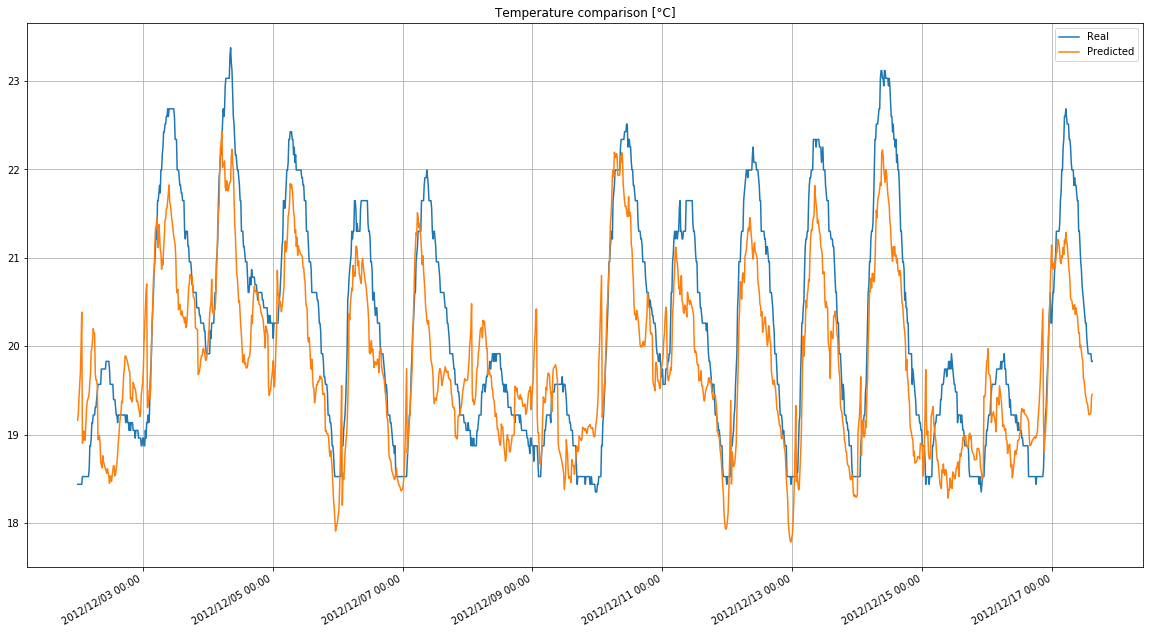

In [26]:
lge = 0
rge = 6000
plt.rcParams["figure.figsize"] = (20,10)

ax = plt.subplot()

########### Configuration of x label ################################
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
########### Prediction vs real ################################
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M'))
ax.xaxis_date()
ax.plot_date(t[train_num:train_num+test_num], Ti[train_num+2:train_num+test_num+2], label='Real', ls='-', marker='')
ax.plot_date(t[train_num:train_num+test_num], test_predictions, label='Predicted', ls='-', marker='')
ax.grid()
ax.legend(loc="best")
ax.set_title("Temperature comparison [°C]")